### <h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA 
</center></font>


<center><h2>Actividad 7</h2></center>
<center><h3>Image</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Javier Brito</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>
 

## 1. Operaciones usando Pytorch y OpenCV

### 1.1 Instala Numpy, Pytorch y OpenCV: 
- Carga una imagen desde un archivo con extensión JPG, usando numpy, pytorch y opencv.
- Presenta la imagen
- Transforma la imagen de color a escala de grises usando cada uno de los paquetes
- Guarda la imagen nueva.
- Presenta la imagen transformada en el notebook.

<p align="justify">
Asegurate de presentar adecuandamente la imagen, usando Matplotlib u otro medio de ploteo.

In [1]:
import numpy as np
import cv2
import torch
import matplotlib.pyplot as plt

In [2]:
##-------------------Imagen usando OpenCV2-------------------------------------------
file_path = 'image.png'##
img_cv = cv2.imread(file_path)                      ## Se lee la imagen en la ruta
                                                    ## especificada
img_cv_rgb = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)## Cambio de base, de BGR a RGB
## Leyendo imagen con numpy-----------------------------------------
img_np_rgb=np.array(img_cv_rgb)

## Imagen cargada usando PyTorch------------------------------------
img_pt = torch.from_numpy(img_np_rgb).permute(2, 0, 1)  
## Convierte el array de numpy a formato HxWxC, el cual es Heigh,Width y Channels.
##-----------------------------------------------------------------------------------

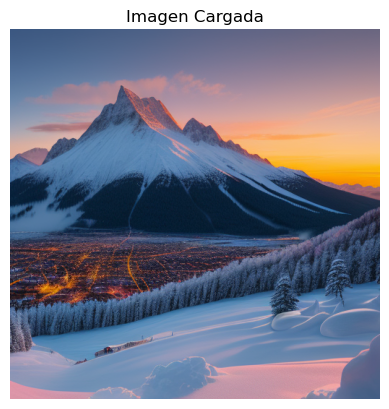

In [3]:
plt.imshow(img_cv_rgb)
plt.title("Imagen Cargada")
plt.axis('off')
plt.show()

In [4]:
##----------Cambio de imagen rbg a escala de grises usando OpenCv------------
img_gray_cv = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)
##----------------Se utilizan los coeficientes [0.2989, 0.5870, 0.1140]------
##---------------------------------------------[R, G, B] respectivamente-----
## Se utiliza la formula Grayscale = 0.2989×R + 0.5870×G + 0.1140×B----------
## Dicha formula se utilizara en los canales y tensores 
               
## Escala de grises aplicado al array de numpy
img_gray_np = np.dot(img_np_rgb[...,:3], [0.2989, 0.5870, 0.1140]).astype(np.uint8)
## Escala de grises aplicado a tensores en Torch
img_gray_pt = 0.2989 * img_pt[0, :, :] + 0.5870 * img_pt[1, :, :] + 0.1140 * img_pt[2, :, :]
img_gray_pt = img_gray_pt.to(torch.uint8)
##-------------------------------------------------------------------------------

In [5]:
cv2.imwrite('imagen_cv.jpg', img_gray_cv)        ## Se guardan las imagenes para la entrega 
cv2.imwrite('imagen_np.jpg', img_gray_np)        ##
cv2.imwrite('imagen_pt.jpg', img_gray_pt.numpy())##

True

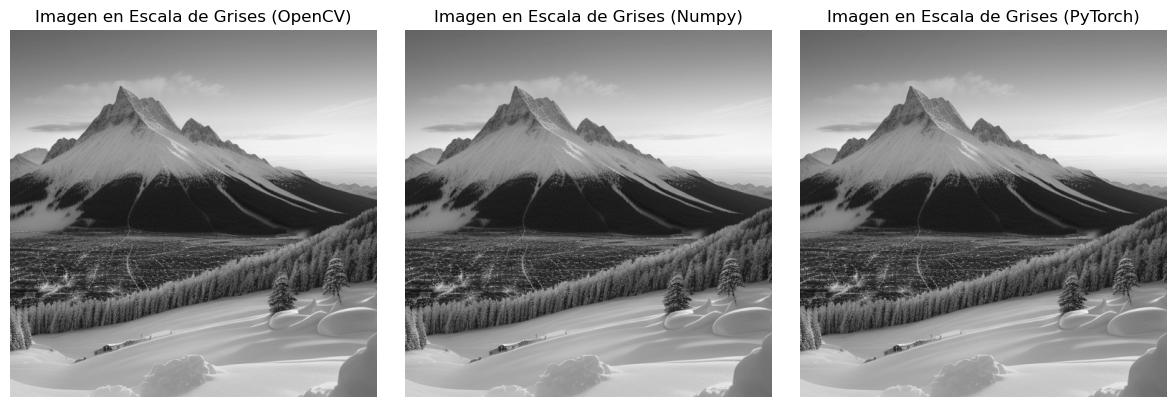

In [6]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img_gray_cv, cmap='gray')
plt.title("Imagen en Escala de Grises (OpenCV)")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_gray_np, cmap='gray')
plt.title("Imagen en Escala de Grises (Numpy)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_gray_pt.numpy(), cmap='gray')
plt.title("Imagen en Escala de Grises (PyTorch)")
plt.axis('off')

plt.tight_layout()
plt.show()

## 2. Multiples operaciones con tensores
### ¡USA LA IMAGEN ADJUNTA image.png!

#### 2.1 Aplica una transformación puntual. Modifica el valor de los pixeles considerando un valor de umbral (threshold). la función de treshold debe ser una rampa con una pendiente dada (tu defines el valor de la pendiente) y cuyo valor mínimo será 0 y el máximo será 255 (valores típicos de los pixeles).

In [7]:
def threshold(image, amplitud):
    threshold_image = image*amplitud             ## 
    threshold_image[threshold_image > 255] = 255 ## Para establecer el valor maximo como 255
    threshold_image[threshold_image < 0] = 0     ## de la misma forma valor minimo 0
    return threshold_image.astype(np.uint8)

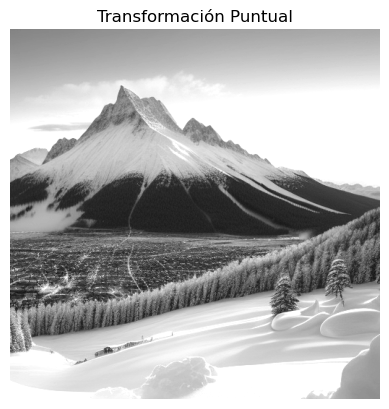

In [8]:
mult_pixel = 1.6  # Puedes ajustar este valor
threshold_image = threshold(img_gray_np, mult_pixel)

plt.imshow(threshold_image, cmap='gray')
plt.title('Transformación Puntual')
plt.axis('off')
plt.show()

#### 2.2 Aplica una transformación en la vecindad. 
- Debes hacer una vecindad con dimensiones de 5x5 pixeles. 
- Aplica la transformación de tal forma que los pixeles cambien para tener el valor correspondiente al máximo de todos los vecinos.
- Debes hacer la misma operación a lo largo y ancho de toda la imagen. ESto implica, de forma iterativa, recorrer la imagen.



In [9]:
def funcion_vecindad(imagen, mascara):
    alto, ancho = imagen.shape[:2]   ## Obtencion de la dimension de los canales RGB o Gray
    alto_m, ancho_m = mascara.shape  ## Tamaño de la mascara a utilizar
    resultado = np.zeros_like(imagen)## Matriz vacia con el tamaño de la imagen
    ## Recorre la imagen utilizando como indices de los ciclos lo parametros ya obtenidos
    for i in range(alto):
        for j in range(ancho):
            vecindad = []
            for m in range(-alto_m//2, alto_m//2 + 1):
                for n in range(-ancho_m//2, ancho_m//2 + 1):
                    if 0 <= i+m < alto and 0 <= j+n < ancho:
                        vecindad.append(imagen[i+m, j+n])## Se guardan lo valores para encontrar el maximo
            resultado[i, j] = np.max(vecindad) ## Se guarda el valor maximo guardado en vecindad
            
    return resultado

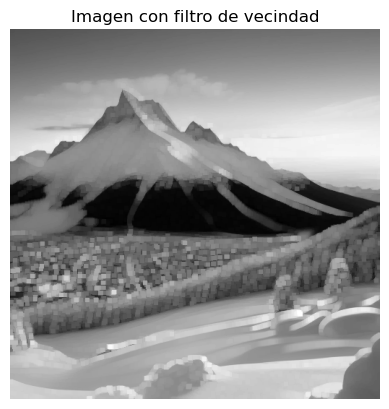

In [10]:
image = img_gray_np
mascara = np.array([[1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1]])
resultado = funcion_vecindad(image, mascara)
plt.imshow(resultado,cmap='gray')
plt.title('Imagen con filtro de vecindad')
plt.axis('off')
plt.show()

#### 2.3 Aplica transformación de intensidad
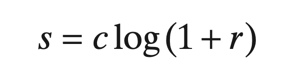
- Debes hacer una vecindad con dimensiones de 10x10 pixeles. 
- Aplica la transformación que aparece en la ecuación de tal forma que los pixeles cambien dependiendo de la posición (r) y el coeficiente c (de tu elección).
- Debes hacer la misma operación a lo largo y ancho de toda la imagen. ESto implica, de forma iterativa, recorrer la imagen.

In [11]:
def filtro_log(image, c):                       ## Filtro logaritmico en funcion de imagen y c
    log_image = c * np.log(1 + image.astype(np.float32)) ## S=c*log(1+r)
    log_image = np.clip(log_image, 0, 255)               ## Se limitan los valores entre 0,255
    return log_image.astype(np.uint8)

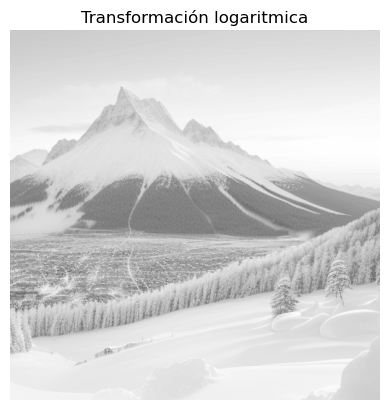

In [12]:
c = 30                            ## Coeficiente c
log_filter = filtro_log(image, c) ## LLamado a la funcion

plt.imshow(log_filter, cmap='gray')
plt.title('Transformación logaritmica')
plt.axis('off')
plt.show()

#### 2.4 Operación con Kernel
- Realiza tres operaciones de convolución en cascada. 
- Utiliza torch nn.Conv2d
- Debes calcular el stride, padding y demás parámetros para que obtengas 16 canales de salida.
- Muestra una imagen de cada canal resultante de la convolución.

In [13]:
img_pt = torch.from_numpy(img_np_rgb).permute(2, 0, 1).float() / 255.0## Tensor obtenido desde numpy y se cambia de orden los ejes
img_pt = img_pt.unsqueeze(0)                                          ## Se agrega una dimension a la imagen para correr el algoritmo

In [14]:
import torch.nn as nn
class ConvCascade(nn.Module):## Clase encargada de realizar las convoluciones.
    def __init__(self):
        super(ConvCascade, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, stride=1, padding=1)
        
    def forward(self, x):
        x = self.conv1(x)## Primera convolución
        x = torch.relu(x) 
        x = self.conv2(x)## Segunda convolución
        x = torch.relu(x) 
        x = self.conv3(x)## Tercera convolución
        x = torch.relu(x)
        return x

model = ConvCascade() ## Se crea el objeto de la clase
output = model(img_pt)## Se utiliza de entrada la imagen.

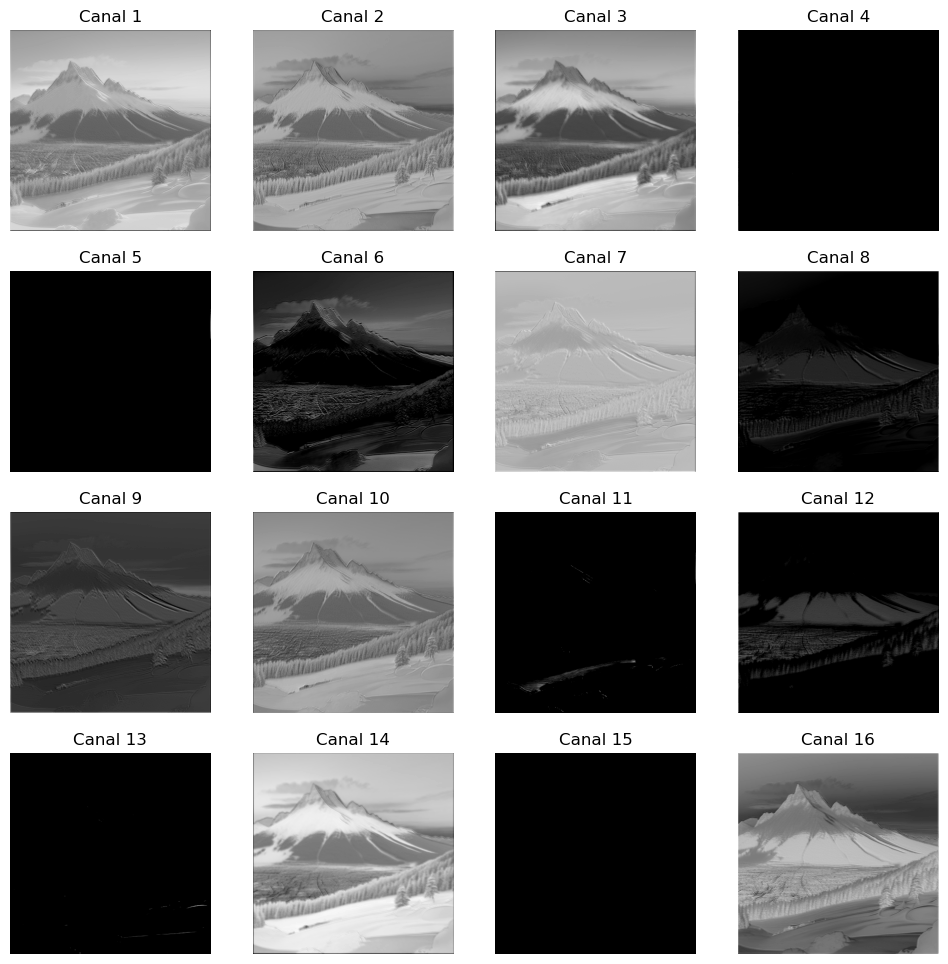

In [15]:
##---------------Visualizar los 16 canales de salida--------------------
output = output.squeeze(0)## Se quita la dimension que indica que imagen
                          ## del lote corresponde
fig, axs = plt.subplots(4, 4, figsize=(12, 12))
for i in range(16):
    ax = axs[i // 4, i % 4]
    ax.imshow(output[i].detach().numpy(), cmap='gray')
    ax.set_title(f'Canal {i+1}')
    ax.axis('off')
plt.show()

## 3. Realiza la inversión de imagen

### 3.1 Utilizando estrictamente numpy, busca y usa una imagen binaria y realizar la inversión de dicha imagen.
### Recuerda adjuntar la imagen a la entrega de tu trabajo.


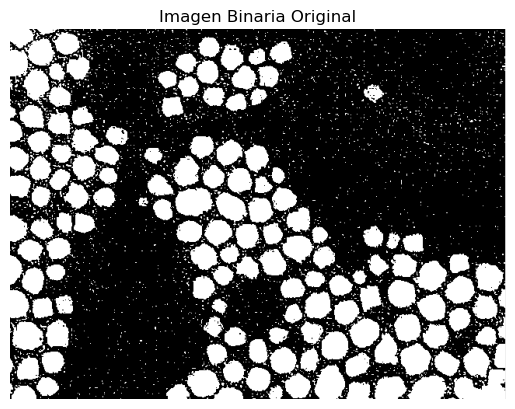

In [16]:
binary_image_path = 'binary_image.png'
binary_image = cv2.imread(binary_image_path, cv2.IMREAD_GRAYSCALE)

plt.imshow(binary_image, cmap='gray')
plt.title('Imagen Binaria Original')
plt.axis('off')
plt.show()

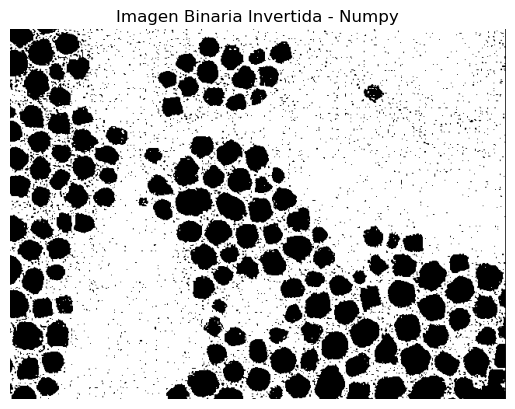

In [17]:
img_invertida = 255 - binary_image   ## Se le resta el valor maximo de un pixel en una imagen binaria 
plt.imshow(img_invertida, cmap='gray')
plt.title('Imagen Binaria Invertida - Numpy')
plt.axis('off')
plt.show()

### 3.1 Usando Pytorch y opencv, realiza la inversión de la misma imagen.



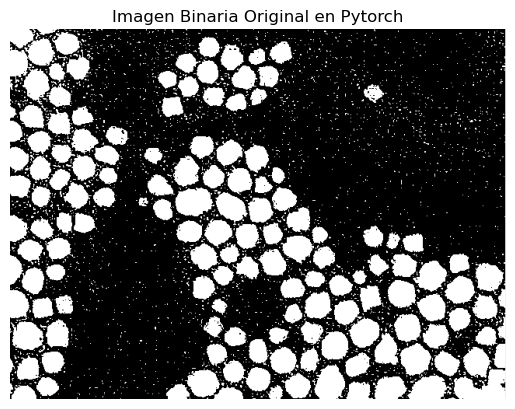

In [18]:
binary_image = cv2.imread(binary_image_path, cv2.IMREAD_GRAYSCALE)
binary_image_tensor = torch.from_numpy(binary_image).float()

plt.imshow(binary_image, cmap='gray')
plt.title('Imagen Binaria Original en Pytorch')
plt.axis('off')
plt.show()

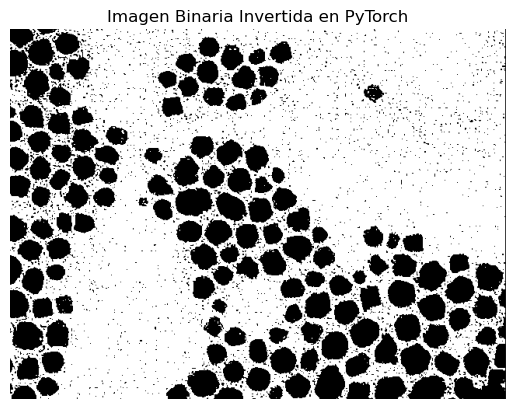

In [19]:
inv_torch = 255 - binary_image_tensor
## Se devuelven los valores desde tensor a array
binary_torch_inv = inv_torch.numpy().astype(np.uint8)

plt.imshow(binary_torch_inv, cmap='gray')
plt.title('Imagen Binaria Invertida en PyTorch')
plt.axis('off')
plt.show()

In [20]:
cv2.imwrite('inverted_binary_image_torch.png', binary_torch_inv) ## Se guarda la imagen para la entrega

True

## 4. Segmentación de imagen
#### 4.1 Realiza un algoritmo para dividir una imagen con 3 canales RGB de 512x512, en parches (secciones) de 16x16. Presenta cada parche generado de la imagen.
El algoritmo debe tolerar el cambio de imagen por una de menor tamano (128, 64). Claramente, en cada caso el número de parches será menor. 
    

In [21]:
def div_image(image, patch_size):         ## Funcion encargada de segmentar la imagen
    patches = []                          ## Se crea un vector vacio
    height, width, _ = image.shape        ## Se obtienen las dimensiones de imagen
    for i in range(0, height, patch_size):## Se itera dentro de las dimensiones
        for j in range(0, width, patch_size):
            patch = image[i:i+patch_size, j:j+patch_size]
            patches.append(patch)         ## Guarda en una lista cada imagen recortada
    return patches
    
def show_patches(patches, patch_size, image_shape): ## Función para mostrar parches (lista_imagenes_segmentadas,tamaño_parche,proporciones_img)
    num_patches_x = image_shape[1] // patch_size    ##
    num_patches_y = image_shape[0] // patch_size    ##
    
    fig, ax = plt.subplots(num_patches_y, num_patches_x, figsize=(10, 10))
    for idx, patch in enumerate(patches):
        i = idx // num_patches_x
        j = idx % num_patches_x
        if num_patches_y > 1:
            ax[i, j].imshow(patch)
            ax[i, j].axis('off')
        else:
            ax[j].imshow(patch)
            ax[j].axis('off')
    plt.show()

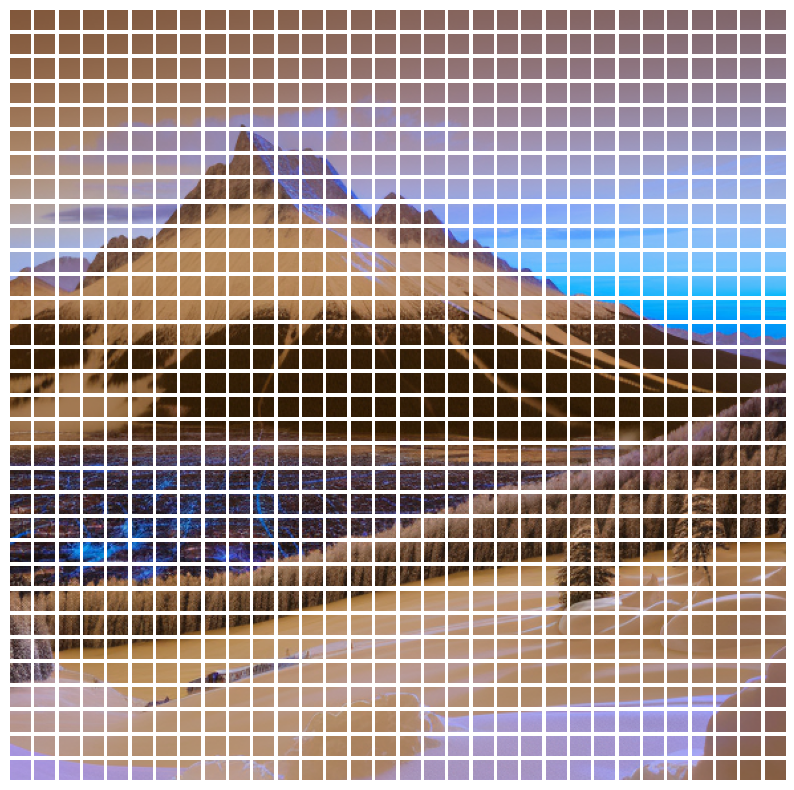

In [22]:
image_path = 'image.png'
image = cv2.imread(image_path)
patch_size = 16                               ## Tamaño de parche 16x16
patches = div_image(image, patch_size)        ## Devuelve una lista de imagenes
show_patches(patches, patch_size, image.shape)## Grafica cada imagen 16x16 en orden de dicha lista

## 5. Referencias
<p align="justify">
    
[OpenCV] https://docs.opencv.org/4.x/d7/da8/tutorial_table_of_content_imgproc.html

[inversion] https://medium.com/analytics-vidhya/inverting-an-image-using-numpys-broadcasting-method-1f5beb7f9fa5#:~:text=In%20order%20to%20invert%20the,negation)%20operation%20to%20the%20image.
